# Man or Woman Classifier

- By [Himanshu Goswami](https://github.com/HimGos)

![both](https://thumbs.dreamstime.com/b/casual-fashion-man-woman-looking-each-other-men-women-leaning-against-white-wall-33178793.jpg)

### Importing Libraries

In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

### Downloading images of Men & Women

 - Using DuckDuckGo_Search library to fetch images urls
 - Using FastDownload libary to download images from urls

In [2]:
def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('man photos', max_images=1)
urls[0]

Searching for 'man photos'


'https://get.pxhere.com/photo/man-person-people-hair-male-portrait-model-spring-fashion-hairstyle-smile-temple-head-photograph-beauty-photo-shoot-portrait-photography-16530.jpg'

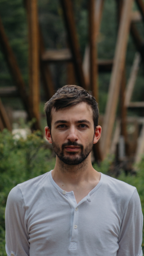

In [4]:
from fastdownload import download_url
dest = 'man.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'woman photos'


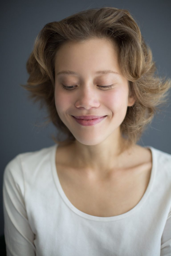

In [5]:
download_url(search_images('woman photos', max_images=1)[0], 'woman.jpg', show_progress=False)
Image.open('woman.jpg').to_thumb(256,256)

### Creating Dataset

- Downloading man and woman pics. Both in seperate folders under a single one.
- Downloading their images of categories like general, stylish, fashion, physique man/woman.

In [6]:
searches = 'man','woman'
path = Path('man_or_woman')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} stylish photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} fashion photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} physique photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'man photo'
Searching for 'man stylish photo'
Searching for 'man fashion photo'
Searching for 'man physique photo'
Searching for 'woman photo'
Searching for 'woman stylish photo'
Searching for 'woman fashion photo'
Searching for 'woman physique photo'


##### Checking how many downloaded files are useless or not images. Delete Them.

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

> - To train a model, we'll need DataLoaders, which is an object that contains a training set (the images used to create a model) and a validation set (the images used to check the accuracy of a model -- not used during training). In fastai we can create that easily using a DataBlock, and view sample images from it:

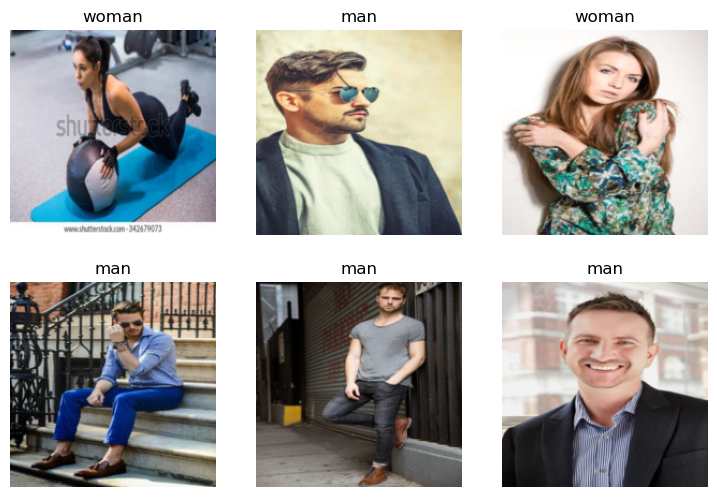

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

### Training Model using RESNET18 architecture.

- fastai has fine_tune() method which will automatically use best practice to fine tune a pre-trained model.

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\Himz\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Himz\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.693898,0.251254,0.090278,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.220961,0.246675,0.076389,00:28
1,0.135545,0.213400,0.083333,00:27
2,0.094348,0.161149,0.076389,00:27


> Ran for merely 3 epochs.

### Testing our model

- Using the man pic which we downloaded earlier.

In [20]:
label,_ ,prob = learn.predict('man.jpg')
print(f"This is a: {label}.")
print(f"Probability: {prob[0]:.4f}")

This is a: man.
Probability: 0.9991
